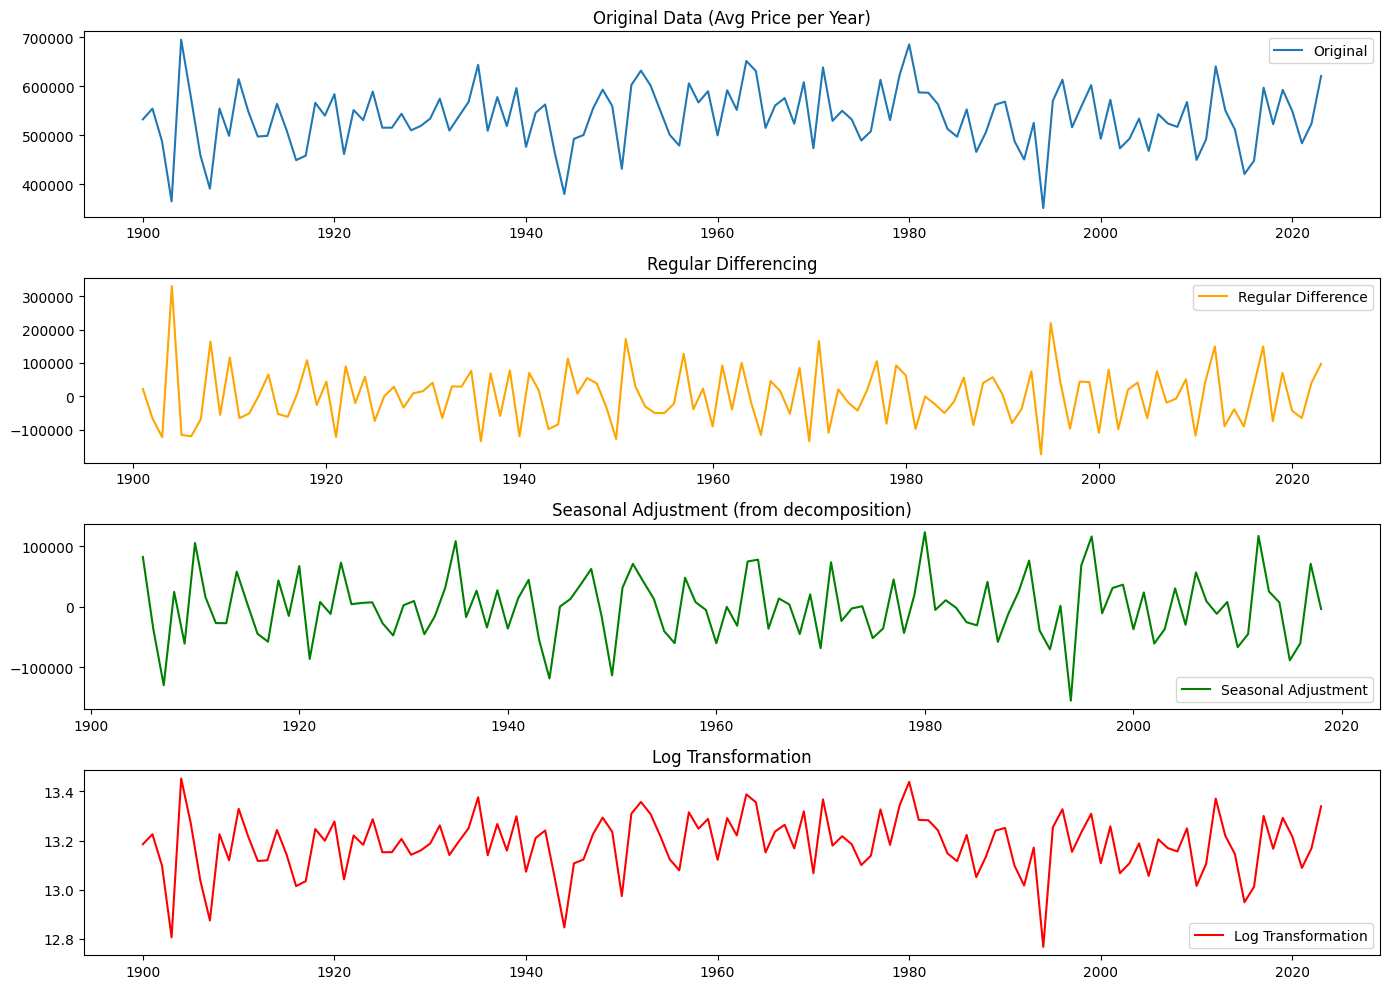

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load dataset
df = pd.read_csv("/content/House Price Prediction Dataset.csv")

# Group by YearBuilt (average price per year)
df_yearly = df.groupby("YearBuilt")["Price"].mean().reset_index()

# Convert YearBuilt to datetime (so it works as a time index)
df_yearly["YearBuilt"] = pd.to_datetime(df_yearly["YearBuilt"], format='%Y')
df_yearly.set_index("YearBuilt", inplace=True)

# Original time series
ts = df_yearly["Price"]

# Regular differencing (remove trend)
df_yearly["Regular Difference"] = ts.diff()

# Seasonal decomposition (period = 10 years here as an example)
# You can change period depending on dataset size
result = seasonal_decompose(ts, model='additive', period=10)
df_yearly["Seasonal Adjustment"] = result.resid

# Log transformation (stabilize variance)
df_yearly["Log Transformation"] = np.log(ts)

# Plot transformations
plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
plt.plot(ts, label='Original')
plt.legend(loc='best')
plt.title('Original Data (Avg Price per Year)')

plt.subplot(4, 1, 2)
plt.plot(df_yearly["Regular Difference"], label='Regular Difference', color='orange')
plt.legend(loc='best')
plt.title('Regular Differencing')

plt.subplot(4, 1, 3)
plt.plot(df_yearly["Seasonal Adjustment"], label='Seasonal Adjustment', color='green')
plt.legend(loc='best')
plt.title('Seasonal Adjustment (from decomposition)')

plt.subplot(4, 1, 4)
plt.plot(df_yearly["Log Transformation"], label='Log Transformation', color='red')
plt.legend(loc='best')
plt.title('Log Transformation')

plt.tight_layout()
plt.show()


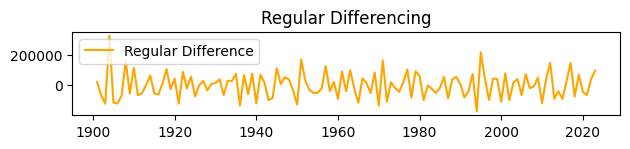

In [3]:

plt.subplot(4, 1, 2)
plt.plot(df_yearly["Regular Difference"], label='Regular Difference', color='orange')
plt.legend(loc='best')
plt.title('Regular Differencing')



In [ ]:
plt.subplot(4, 1, 3)
plt.plot(df_yearly["Seasonal Adjustment"], label='Seasonal Adjustment', color='green')
plt.legend(loc='best')
plt.title('Seasonal Adjustment (from decomposition)')

In [ ]:
plt.subplot(4, 1, 4)
plt.plot(df_yearly["Log Transformation"], label='Log Transformation', color='red')
plt.legend(loc='best')
plt.title('Log Transformation')